In [1]:
import numpy as np 
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = load_diabetes()

In [3]:
class Model:
    def __init__(self):
        self.beta_0 = np.random.randn(1)
        self.beta_1 = np.random.randn(1)

    def __call__(self, x):
        return self.beta_1 * x + self.beta_0

In [4]:
model = Model()

In [5]:
model.beta_0

array([-1.52041052])

In [6]:
model.beta_1


array([-1.31768691])

In [7]:
model(3.0)

array([-5.47347123])

In [8]:
diabetes_data = df.data
y = df.target

In [9]:
X = diabetes_data[:,2]

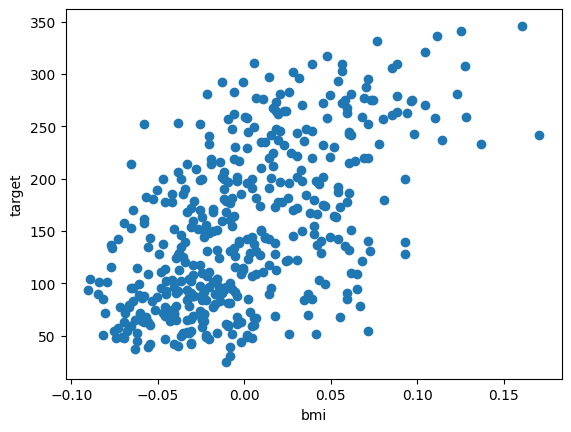

In [10]:
plt.scatter(x = X, y = y)
plt.xlabel(df.feature_names[2])
plt.ylabel("target")
plt.show()

In [11]:
def mse(x, y):
    return np.mean((x - y)**2)

def rmse(X, Y):
    return np.sqrt(mse(X,Y))

In [13]:
print("MSE : ",mse(model(X), y))
print("RMSE : ",rmse(model(X), y))


MSE :  29545.06907360509
RMSE :  171.88679144601278


In [14]:
rmse(X, y)

168.92052347561886

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    mode="markers",
    x= X,
    y= y,
    name="target"
))

fig.add_trace(go.Scatter(
    mode='lines',
    x=X,
    y= model(X),
    name="prediction"
))

fig.show()

In [15]:
def derivate_mse_beta_1(y_pred, y_true, x):
    return 2/len(y_pred)*np.sum((x @ (y_pred - y_true)))

def derivate_mse_beta_0(y_pred, y_true):
    return 2/len(y_pred)*(np.sum(y_pred - y_true))

In [16]:
print(derivate_mse_beta_1(model(X), y, X))

print(derivate_mse_beta_0(model(X), y))

-4.30204953524524
-307.30778936196515


In [17]:
lr = 0.1

print("OLD model.a = {}".format(model.beta_1))
print("OLD model.b = {}".format(model.beta_0))

model.beta_1 -= lr * derivate_mse_beta_1(model(X), y, X)
model.beta_0 -= lr * derivate_mse_beta_0(model(X), y)


print("NEW model.a = {}".format(model.beta_1))
print("NEW model.b = {}".format(model.beta_0))


OLD model.a = [-1.31768691]
OLD model.b = [-1.52041052]
NEW model.a = [-0.88748195]
NEW model.b = [29.21036842]


In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    mode="markers",
    x= X,
    y= y,
    name="target"
))

fig.add_trace(go.Scatter(
    mode='lines',
    x=X,
    y= model(X),
    name="prediction"
))

fig.show()

In [19]:
mse(model(X),y)

21043.79176308097

In [20]:
lr = 0.1
epochs = 10000

In [23]:
model = Model()

for epoch in range(epochs):
    current_loss = mse(model(X),y)
    model.beta_1 -= lr * derivate_mse_beta_1(model(X), y, X)
    model.beta_0 -= lr * derivate_mse_beta_0(model(X), y)

    if epoch % 1000 == 0 or epoch == epochs -1:
          print("-------------------- Epoch {} --------------------".format(epoch))
    print("Current Loss: {}".format(current_loss))
    print("beta_1 = {}".format(model.beta_1))
    print("beta_0 = {}".format(model.beta_0))


-------------------- Epoch 0 --------------------
Current Loss: 29003.371512886715
beta_1 = [-0.18357641]
beta_0 = [30.62075159]
Current Loss: 20696.017809586752
beta_1 = [0.24611537]
beta_0 = [54.92329811]
Current Loss: 15378.647973622672
beta_1 = [0.67561272]
beta_0 = [74.36533532]
Current Loss: 11974.868413039301
beta_1 = [1.10491573]
beta_0 = [89.91896509]
Current Loss: 9795.787228442205
beta_1 = [1.53402448]
beta_0 = [102.3618689]
Current Loss: 8400.513603676312
beta_1 = [1.96293907]
beta_0 = [112.31619195]
Current Loss: 7506.8774158602455
beta_1 = [2.39165958]
beta_0 = [120.2796504]
Current Loss: 6934.289785808266
beta_1 = [2.82018609]
beta_0 = [126.65041715]
Current Loss: 6567.173830300348
beta_1 = [3.2485187]
beta_0 = [131.74703055]
Current Loss: 6331.560343534999
beta_1 = [3.6766575]
beta_0 = [135.82432127]
Current Loss: 6180.109033259089
beta_1 = [4.10460257]
beta_0 = [139.08615385]
Current Loss: 6082.522111890921
beta_1 = [4.532354]
beta_0 = [141.69561991]
Current Loss: 6019

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    mode="markers",
    x= X,
    y= y,
    name="target"
))

fig.add_trace(go.Scatter(
    mode='lines',
    x=X,
    y= model(X),
    name="prediction"
))

fig.show()